# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

# ============ *Travel Package Purchase Prediction* ===========

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

## Problem Statement
Tourism is one of the most rapidly growing global industries and tourism forecasting is becoming an increasingly important activity in planning and managing the industry. Because of high fluctuations of tourism demand, accurate predictions of purchase of travel packages are of high importance for tourism organizations.

## Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

## Result
The goal is to predict whether the customer will purchase the travel or not.

## Dataset
https://github.com/Suvam-Bit/Datasets/blob/main/Tourism%20Package%20Purchase%20Prediction/tourism-data.xlsx

## Data Description
CustomerID :	Unique customer ID

ProdTaken : 	Product taken flag

Age :	Age of customer

TypeofContact :   How the customers was contacted

CityTier:	City tier

DurationOfPitch :	Duration of pitch by a sales man to customer

Occupation :	Occupation of customer

Gender :	Gender of customer

NumberOfPersonVisited :	Total number of person came with customer

NumberOfFollowups :	Total number of follow up has been done by sales person after sales pitch

ProductPitched :	Product pitched by sales person

PreferredPropertyStar :	Preferred hotel property rating by customer

MaritalStatus :	Marital status of customer

NumberOfTrips :	Average number of trip in a year by customer

Passport :	Customer passport flag

PitchSatisfactionScore :	Sales pitch satisfactory score

OwnCar :	Customers owns a car flag

NumberOfChildrenVisited :	Total number of children visit with customer

Designation :	Designation of customer in current organization

MonthlyIncome :	Gross monthly income of customer

## What's in this Notebook?
This notebook contains the Data Exploration, Data Wrangling, Data Cleaning and Feature Engineering of the dataset so that the data becomes suitable to fit any machine learning techniques and algorithms.

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dataset
df = pd.read_csv("https://raw.githubusercontent.com/Suvam-Bit/Datasets/main/Tourism%20Package%20Purchase%20Prediction/Tourism.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Here our target variable is ProdTaken which is a categorical (binary) variable and all others are the feature variables.

In [3]:
df.shape

(4888, 20)

In the dataset we have 4888 records and 20 attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

Now let's check for the null values.

In [5]:
# null values percentage
df.isnull().sum()/len(df)*100

CustomerID                 0.000000
ProdTaken                  0.000000
Age                        4.623568
TypeofContact              0.511457
CityTier                   0.000000
DurationOfPitch            5.135025
Occupation                 0.000000
Gender                     0.000000
NumberOfPersonVisited      0.000000
NumberOfFollowups          0.920622
ProductPitched             0.000000
PreferredPropertyStar      0.531915
MaritalStatus              0.000000
NumberOfTrips              2.864157
Passport                   0.000000
PitchSatisfactionScore     0.000000
OwnCar                     0.000000
NumberOfChildrenVisited    1.350245
Designation                0.000000
MonthlyIncome              4.766776
dtype: float64

We calculated the proportions of the missing values present in each of the attributes.

So we got 8 attributes having missing values which are

1. Age 2. TypeofContact 3. DurationOfPitch 4. NumberOfFollowups
5. PreferredPropertyStar 6. NumberOfTrips 7. NumberOfChildrenVisited 8. MonthlyIncome

We'll take a quick look towards the basic stats of the numeric attributes.

In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


Now we'll drop the CustomerID column as we found it unnecessary.

In [7]:
# dropping CustomerID
df = df.drop("CustomerID", axis = 1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Let's plot the correlation heatmap for checking multi-collinearity in the data.

In [8]:
# correlation matrix
cor_mat = df.corr()

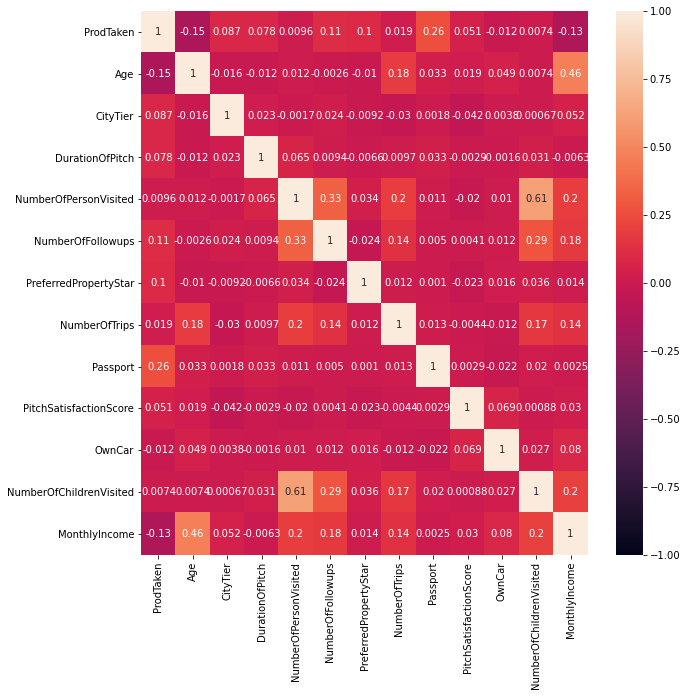

In [9]:
# correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(cor_mat, vmax = 1, vmin = -1, annot = True)
plt.show()

# Exploratory Data Analysis

We will do a little bit of EDA to explore different hidden insights.

# ---Univariate Analysis---

# Categorical Variables

In [10]:
# category counts in ProdTaken
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

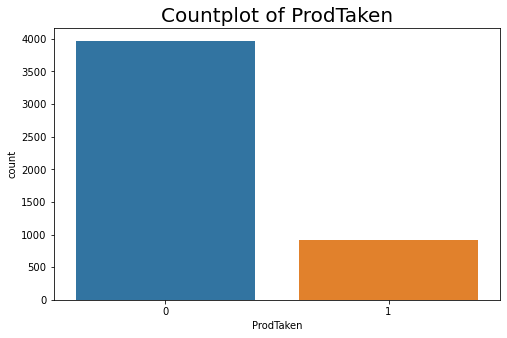

In [11]:
# countplot of ProdTaken
plt.figure(figsize = (8,5))
sns.countplot(x = df['ProdTaken'])
plt.title("Countplot of ProdTaken", size = 20)
plt.show()

Here we observe that the target variable is imbalanced. So this data is IMBALANCED DATA.

In [12]:
# category counts in TypeofContact
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

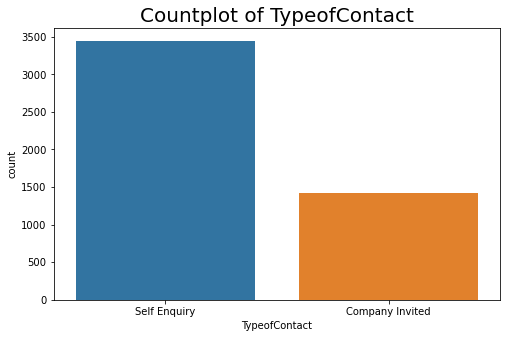

In [13]:
# countplot of TypeofContact
plt.figure(figsize = (8,5))
sns.countplot(x = df['TypeofContact'])
plt.title("Countplot of TypeofContact", size = 20)
plt.show()

In [14]:
# category counts in CityTier
df['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

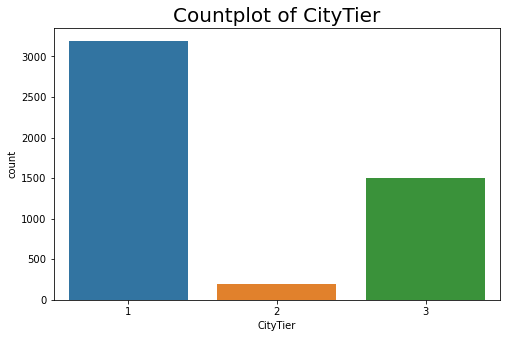

In [15]:
# countplot of CityTier
plt.figure(figsize = (8,5))
sns.countplot(x = df['CityTier'])
plt.title("Countplot of CityTier", size = 20)
plt.show()

In [16]:
# category counts in Occupation
df['Occupation'].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

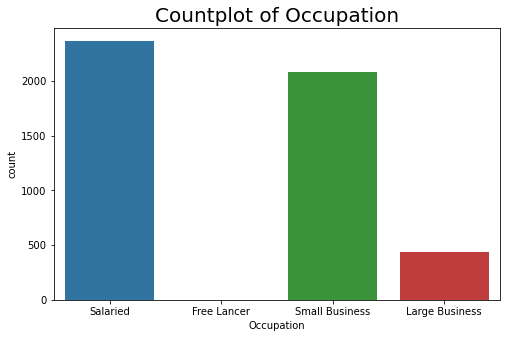

In [17]:
# countplot of Occupation
plt.figure(figsize = (8,5))
sns.countplot(x = df['Occupation'])
plt.title("Countplot of Occupation", size = 20)
plt.show()

In [18]:
# category counts in Gender
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Here we can see a redundency present in female category of gender, like 'Female', 'Fe Male' are the same.

So we will replace the repeated categories accordingly.

In [19]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [20]:
# category counts in Gender
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

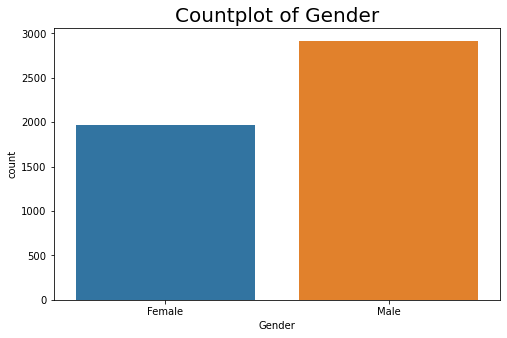

In [21]:
# countplot of Occupation
plt.figure(figsize = (8,5))
sns.countplot(x = df['Gender'])
plt.title("Countplot of Gender", size = 20)
plt.show()

In [22]:
# category counts in NumberOfPersonVisited
df['NumberOfPersonVisited'].value_counts()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64

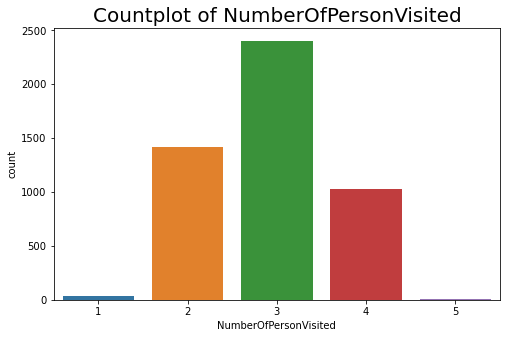

In [23]:
# countplot of NumberOfPersonVisited
plt.figure(figsize = (8,5))
sns.countplot(x = df['NumberOfPersonVisited'])
plt.title("Countplot of NumberOfPersonVisited", size = 20)
plt.show()

In [24]:
# category counts in NumberOfFollowups
df['NumberOfFollowups'].value_counts()

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

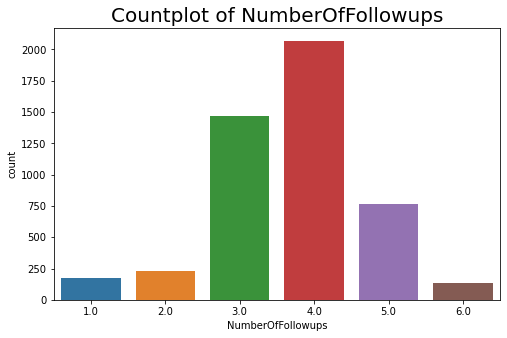

In [25]:
# countplot of NumberOfFollowups
plt.figure(figsize = (8,5))
sns.countplot(x = df['NumberOfFollowups'])
plt.title("Countplot of NumberOfFollowups", size = 20)
plt.show()

In [26]:
# category counts in ProductPitched
df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

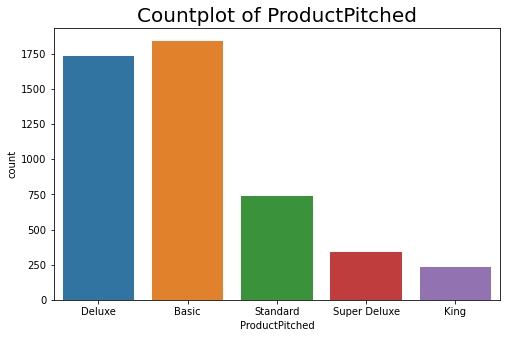

In [27]:
# countplot of ProductPitched
plt.figure(figsize = (8,5))
sns.countplot(x = df['ProductPitched'])
plt.title("Countplot of ProductPitched", size = 20)
plt.show()

In [28]:
# category counts in PreferredPropertyStar
df['PreferredPropertyStar'].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

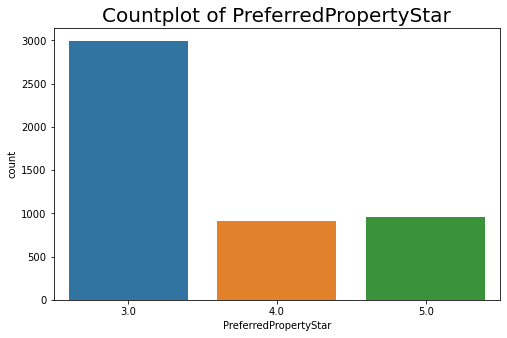

In [29]:
# countplot of PreferredPropertyStar
plt.figure(figsize = (8,5))
sns.countplot(x = df['PreferredPropertyStar'])
plt.title("Countplot of PreferredPropertyStar", size = 20)
plt.show()

In [30]:
# category counts in MaritalStatus
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Here single and unmarried are the same thing. So we replece unmarried with single.

In [31]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried','Single')

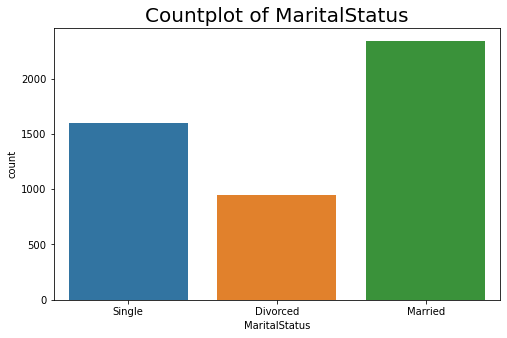

In [32]:
# countplot of PreferredPropertyStar
plt.figure(figsize = (8,5))
sns.countplot(x = df['MaritalStatus'])
plt.title("Countplot of MaritalStatus", size = 20)
plt.show()

In [33]:
# category counts in NumberOfTrips
df['NumberOfTrips'].value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64

Here extreme 4 values (21,19,22,20) can be considered as outliers.

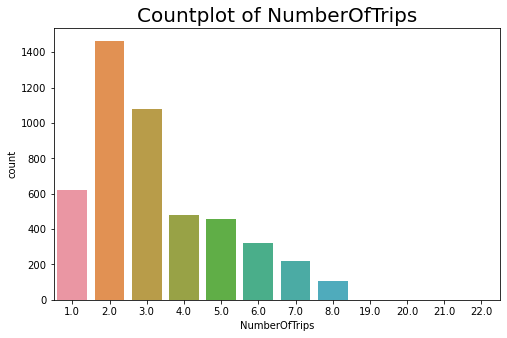

In [34]:
# countplot of NumberOfTrips
plt.figure(figsize = (8,5))
sns.countplot(x = df['NumberOfTrips'])
plt.title("Countplot of NumberOfTrips", size = 20)
plt.show()

In [35]:
# category counts in Passport
df['Passport'].value_counts()

0    3466
1    1422
Name: Passport, dtype: int64

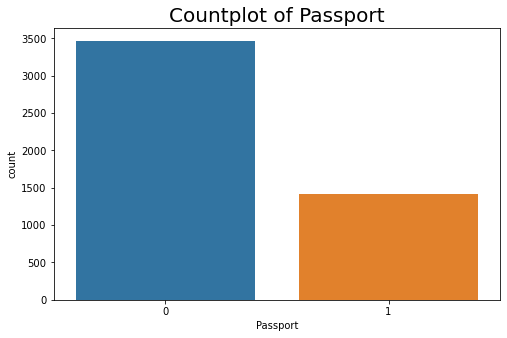

In [36]:
# countplot of Passport
plt.figure(figsize = (8,5))
sns.countplot(x = df['Passport'])
plt.title("Countplot of Passport", size = 20)
plt.show()

In [37]:
# category counts in PitchSatisfactionScore
df['PitchSatisfactionScore'].value_counts()

3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64

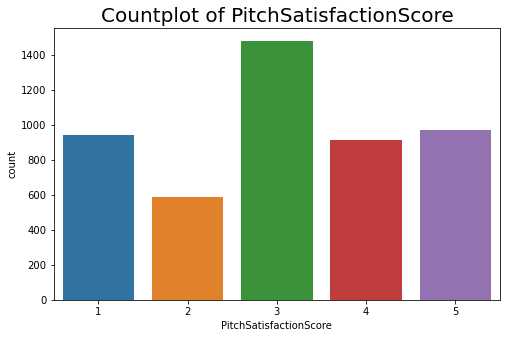

In [38]:
# countplot of PitchSatisfactionScore
plt.figure(figsize = (8,5))
sns.countplot(x = df['PitchSatisfactionScore'])
plt.title("Countplot of PitchSatisfactionScore", size = 20)
plt.show()

In [39]:
# category counts in OwnCar
df['OwnCar'].value_counts()

1    3032
0    1856
Name: OwnCar, dtype: int64

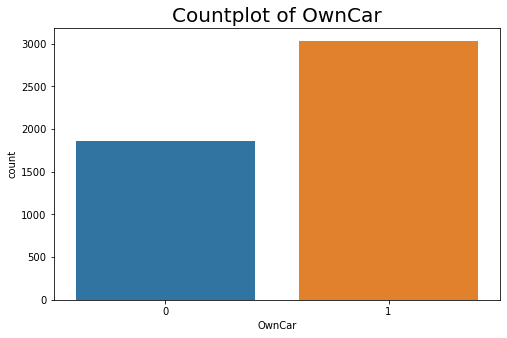

In [40]:
# countplot of OwnCar
plt.figure(figsize = (8,5))
sns.countplot(x = df['OwnCar'])
plt.title("Countplot of OwnCar", size = 20)
plt.show()

In [41]:
# category counts in NumberOfChildrenVisited
df['NumberOfChildrenVisited'].value_counts()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisited, dtype: int64

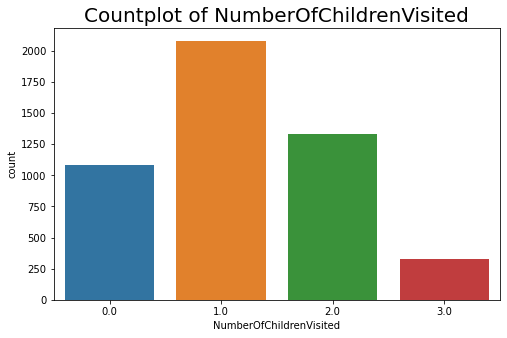

In [42]:
# countplot of NumberOfChildrenVisited
plt.figure(figsize = (8,5))
sns.countplot(x = df['NumberOfChildrenVisited'])
plt.title("Countplot of NumberOfChildrenVisited", size = 20)
plt.show()

In [43]:
# category counts in Designation
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

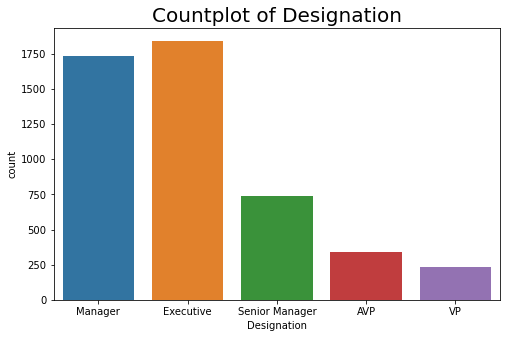

In [44]:
# countplot of Designation
plt.figure(figsize = (8,5))
sns.countplot(x = df['Designation'])
plt.title("Countplot of Designation", size = 20)
plt.show()

# Numeric Variables 

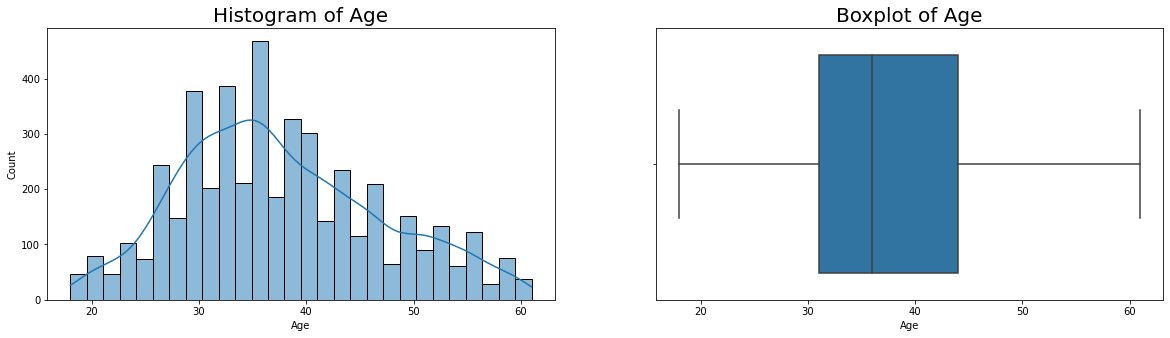

In [45]:
# histogram and boxplot of Age
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df['Age'], kde = True)
plt.title('Histogram of Age', size = 20)

plt.subplot(122)
sns.boxplot(x = df['Age'])
plt.title('Boxplot of Age', size = 20)
plt.show()

plt.show()

Age has no outliers and it has a bell shaped symmetric distribution.

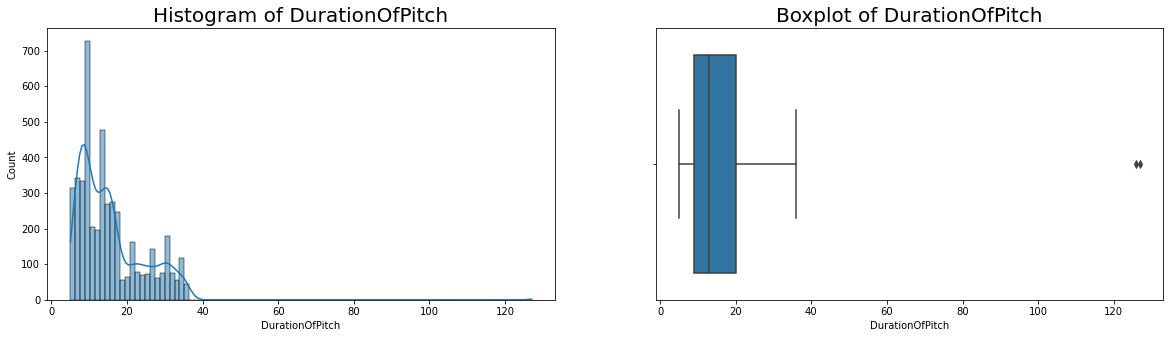

In [46]:
# histogram and boxplot of DurationOfPitch
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df['DurationOfPitch'], kde = True)
plt.title('Histogram of DurationOfPitch', size = 20)

plt.subplot(122)
sns.boxplot(x = df['DurationOfPitch'])
plt.title('Boxplot of DurationOfPitch', size = 20)
plt.show()

plt.show()

Duration of pitch has outliers.

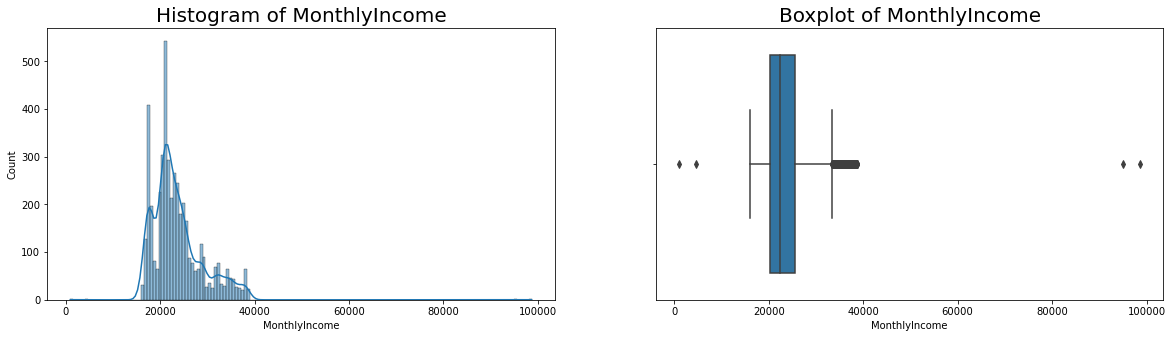

In [47]:
# histogram and boxplot of MonthlyIncome
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df['MonthlyIncome'], kde = True)
plt.title('Histogram of MonthlyIncome', size = 20)

plt.subplot(122)
sns.boxplot(x = df['MonthlyIncome'])
plt.title('Boxplot of MonthlyIncome', size = 20)
plt.show()

plt.show()

Monthly income has a lot of outliers.

# ---Bivariate Analysis---

In [48]:
# attribures in the data
print(list(df.columns))

['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome']


In [49]:
# mean duration of pitch for different number of visited persons 
df.groupby('NumberOfPersonVisited')['DurationOfPitch'].mean()

NumberOfPersonVisited
1    13.914286
2    14.759593
3    15.570126
4    16.271835
5    19.000000
Name: DurationOfPitch, dtype: float64

We see that as the number of persons visited increases, the mean duration of pitch is also increasing.

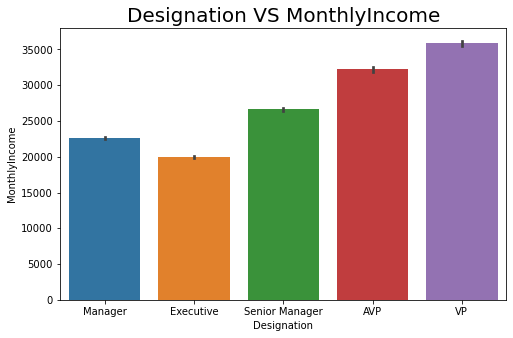

In [50]:
# bar plot of Designation VS MonthlyIncome
plt.figure(figsize = (8,5))
sns.barplot(x = df['Designation'], y = df['MonthlyIncome'])
plt.title("Designation VS MonthlyIncome", size = 20)
plt.show()

The mean monthly income is increasing as the designation increases.

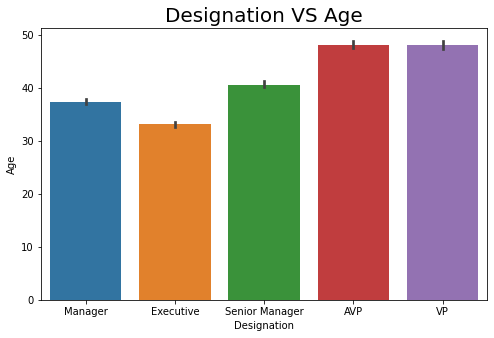

In [51]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['Designation'], y = df['Age'])
plt.title("Designation VS Age", size = 20)
plt.show()

The mean age is increasing as the designation increases.

In [52]:
df2 = df.copy()

# Missing Value Imputation

### Duration of Pitch

In [53]:
# setting outliers as null values
df2.loc[df2['DurationOfPitch'] > 40, 'DurationOfPitch'] = df2.loc[df2['DurationOfPitch'] > 40, 'DurationOfPitch'].apply(lambda x: np.nan)

In [54]:
# replacing null values with mean duration for different number of visited persons 
number_of_persons_visited = df2['NumberOfPersonVisited'].unique()

for i in number_of_persons_visited:
    series = df2.loc[df2['NumberOfPersonVisited'] == i, 'DurationOfPitch']
    df2.loc[df2['NumberOfPersonVisited'] == i, 'DurationOfPitch'] = series.fillna(series.mean())

In [55]:
# checking if there are any null value
df2['DurationOfPitch'].isnull().sum()

0

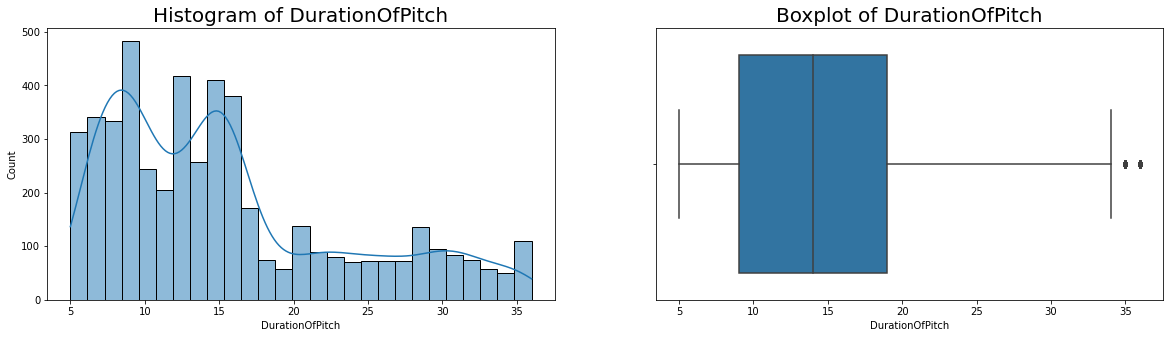

In [56]:
# histogram and boxplot of DurationOfPitch
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df2['DurationOfPitch'], kde = True)
plt.title('Histogram of DurationOfPitch', size = 20)

plt.subplot(122)
sns.boxplot(x = df2['DurationOfPitch'])
plt.title('Boxplot of DurationOfPitch', size = 20)
plt.show()

plt.show()

### Type of Contact

In [61]:
# number of null values before imputation
df2['TypeofContact'].isnull().sum()

25

In [62]:
# replacing null values with mode
df2['TypeofContact'].fillna(df2['TypeofContact'].mode()[0], inplace = True)

In [63]:
# # number of null values after imputation
df2['TypeofContact'].isnull().sum()

0

### Number of FollowUps

In [64]:
# number of null values before imputation
df2['NumberOfFollowups'].isnull().sum()

45

In [65]:
# replacing null values with mode
df2['NumberOfFollowups'].fillna(df2['NumberOfFollowups'].mode()[0], inplace = True)

In [66]:
# # number of null values after imputation
df2['NumberOfFollowups'].isnull().sum()

0

### Preferred Property Star

In [67]:
# number of null values before imputation
df2['PreferredPropertyStar'].isnull().sum()

26

In [68]:
# replacing null values with mode
df2['PreferredPropertyStar'].fillna(df2['PreferredPropertyStar'].mode()[0], inplace = True)

In [69]:
# # number of null values after imputation
df2['PreferredPropertyStar'].isnull().sum()

0

### Number of Trips

In [70]:
df2['NumberOfTrips'].value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64

In [71]:
# replacing the outliers values with 8
series = df2.loc[df2['NumberOfTrips'] > 10, 'NumberOfTrips']
df2.loc[df2['NumberOfTrips'] > 10, 'NumberOfTrips'] = np.where(series > 10, 8, series)

In [72]:
df2['NumberOfTrips'].value_counts()

2.0    1464
3.0    1079
1.0     620
4.0     478
5.0     458
6.0     322
7.0     218
8.0     109
Name: NumberOfTrips, dtype: int64

In [73]:
# number of null values before imputation
df2['NumberOfTrips'].isnull().sum()

140

In [74]:
# replacing null values with mode
df2['NumberOfTrips'].fillna(df2['NumberOfTrips'].mode()[0], inplace = True)

In [75]:
# # number of null values after imputation
df2['NumberOfTrips'].isnull().sum()

0

### Number of children visited

In [76]:
# number of null values before imputation
df2['NumberOfChildrenVisited'].isnull().sum()

66

In [77]:
# replacing null values with mode
df2['NumberOfChildrenVisited'].fillna(df2['NumberOfChildrenVisited'].mode()[0], inplace = True)

In [78]:
# # number of null values after imputation
df2['NumberOfChildrenVisited'].isnull().sum()

0

### Monthly Income

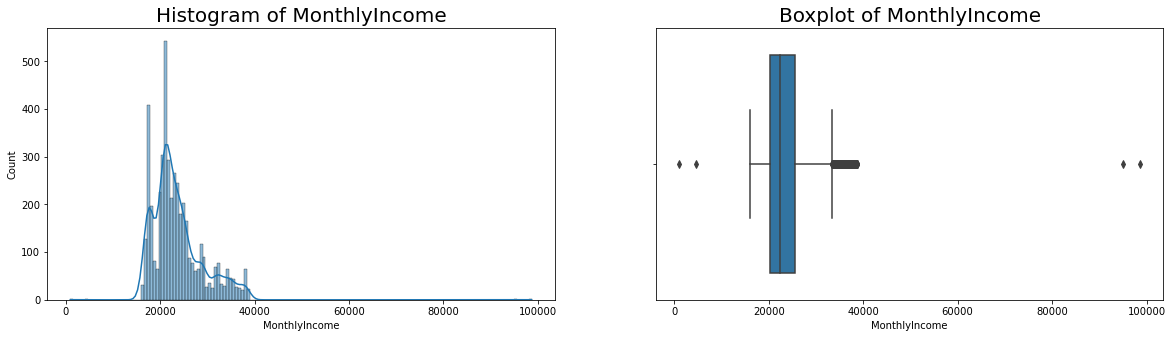

In [79]:
# histogram and boxplot of MonthlyIncome
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df2['MonthlyIncome'], kde = True)
plt.title('Histogram of MonthlyIncome', size = 20)

plt.subplot(122)
sns.boxplot(x = df2['MonthlyIncome'])
plt.title('Boxplot of MonthlyIncome', size = 20)
plt.show()

plt.show()

In [80]:
# setting the outliers as null values
df2.loc[df2['MonthlyIncome'] > 50000, 'MonthlyIncome'] = df2.loc[df2['MonthlyIncome'] > 50000, 'MonthlyIncome'].apply(lambda x: np.nan)
df2.loc[df2['MonthlyIncome'] < 10000, 'MonthlyIncome'] = df2.loc[df2['MonthlyIncome'] < 10000, 'MonthlyIncome'].apply(lambda x: np.nan)

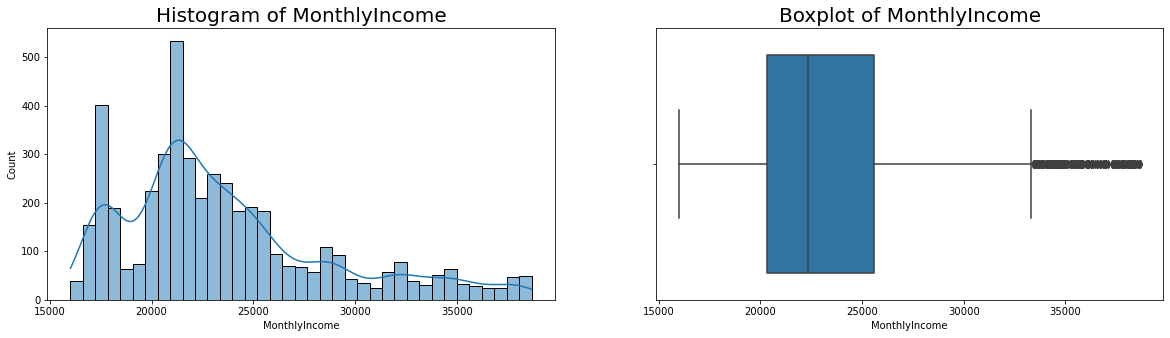

In [81]:
# histogram and boxplot of MonthlyIncome
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df2['MonthlyIncome'], kde = True)
plt.title('Histogram of MonthlyIncome', size = 20)

plt.subplot(122)
sns.boxplot(x = df2['MonthlyIncome'])
plt.title('Boxplot of MonthlyIncome', size = 20)
plt.show()

plt.show()

We intentionally keep the these outliers because these values are not coming from sky. They represent the monthly income for AVP and VP. So they are naturally high.

In [82]:
# number of null values before imputation
df2['MonthlyIncome'].isnull().sum()

237

In [83]:
# replacing null values with mean monthly income for different designations 
designation = df2['Designation'].unique()

for i in designation:
    series = df2.loc[df2['Designation'] == i, 'MonthlyIncome']
    df2.loc[df2['Designation'] == i, 'MonthlyIncome'] = series.fillna(series.mean())

In [84]:
# number of null values after imputation
df2['MonthlyIncome'].isnull().sum()

0

### Age

In [85]:
# number of null values before imputation
df2['Age'].isnull().sum()

226

In [86]:
# replacing null values with mean age for different designations 
designation = df2['Designation'].unique()

for i in designation:
    series = df2.loc[df2['Designation'] == i, 'Age']
    df2.loc[df2['Designation'] == i, 'Age'] = series.fillna(series.mean())

In [87]:
# number of null values after imputation
df2['Age'].isnull().sum()

0

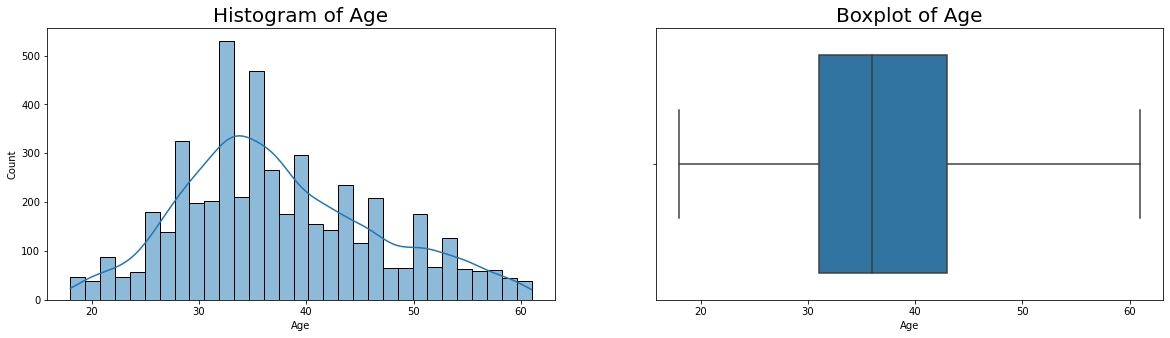

In [88]:
# histogram and boxplot of Age
plt.figure(figsize = (20,5))

plt.subplot(121)
sns.histplot(x = df2['Age'], kde = True)
plt.title('Histogram of Age', size = 20)

plt.subplot(122)
sns.boxplot(x = df2['Age'])
plt.title('Boxplot of Age', size = 20)
plt.show()

plt.show()

In [89]:
# Checking null values in data
df2.isnull().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [90]:
df2.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,33.054181,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [87]:
# saving non-encoded preprocessed data as .csv file
df2.to_csv('preprocessed2.csv', index=False)

In [91]:
df3 = df2.copy()

# One-Hot Encoding

In [92]:
df3.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,33.054181,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [93]:
type_of_contact = pd.get_dummies(df3['TypeofContact'], drop_first=True)
type_of_contact.head()

,Self Enquiry
0,1
1,0
2,1
3,0
4,1


In [94]:
occupation = pd.get_dummies(df3['Occupation'], drop_first=True)
occupation.head()

,Large Business,Salaried,Small Business
0,0,1,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,1


In [95]:
gender = pd.get_dummies(df3['Gender'], drop_first=True)
gender.head()

,Male
0,0
1,1
2,1
3,0
4,1


In [96]:
prod_pitched = pd.get_dummies(df3['ProductPitched'], drop_first=True)
prod_pitched.head()

,Deluxe,King,Standard,Super Deluxe
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [97]:
marital_status = pd.get_dummies(df3['MaritalStatus'], drop_first=True)
marital_status.head()

,Married,Single
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [98]:
designation = pd.get_dummies(df3['Designation'], drop_first=True)
designation.head()

,Executive,Manager,Senior Manager,VP
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [99]:
df3 = pd.concat([df3, type_of_contact, occupation, gender, prod_pitched, marital_status, designation], axis = 1)
df3 = df3.drop(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'], axis = 1)

In [100]:
df3.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Deluxe,King,Standard,Super Deluxe,Married,Single,Executive,Manager,Senior Manager,VP
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,1,0,0,0,0,1,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,1,0,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,0,1,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,33.054181,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0


In [98]:
# saving the one-hot encoded preprocessed data as .csv file
df3.to_csv('preprocessed.csv', index = False)

# Checking Gaussian Distribution

In [101]:
import scipy.stats as stats

def QQ_plot(series):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(121)
    sns.histplot(series, kde = True)
    
    plt.subplot(122)
    stats.probplot(series, plot = plt)
    
    plt.show()

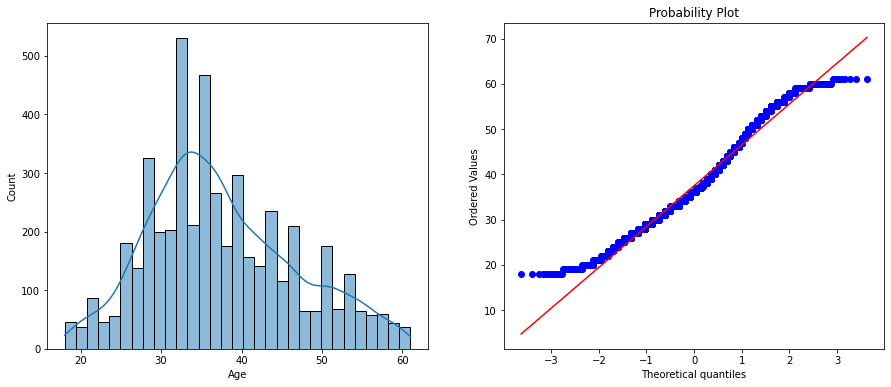

In [102]:
QQ_plot(df3['Age'])

Age is approximately Gaussian distributed.

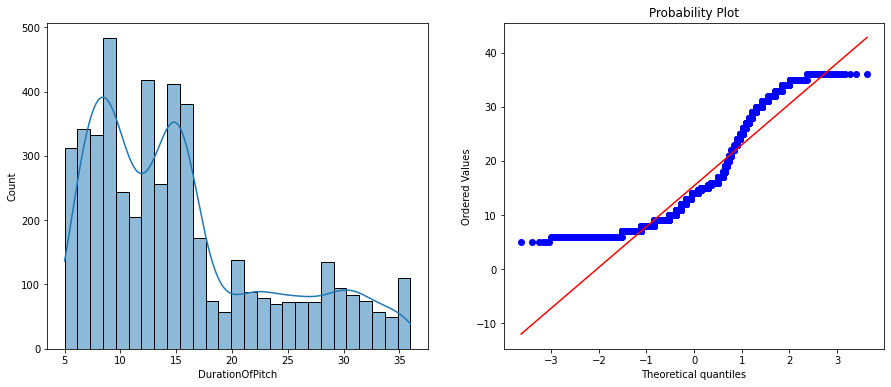

In [103]:
QQ_plot(df3['DurationOfPitch'])

Duration of pitch has a skewed distribution.

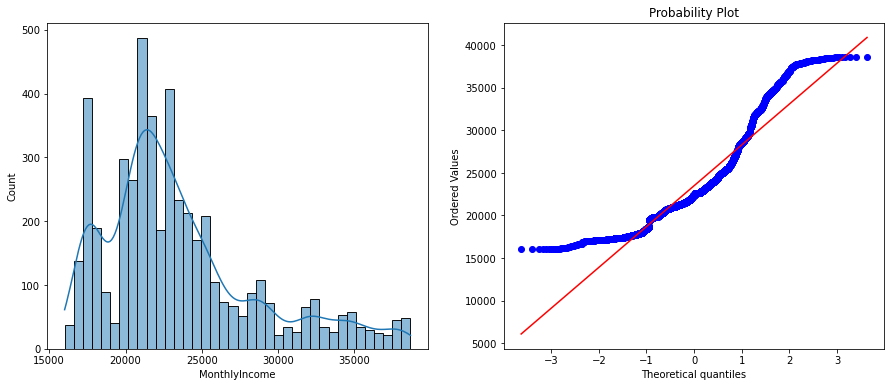

In [104]:
QQ_plot(df3['MonthlyIncome'])

Monthly income has a skewed distribution

# Transform To Gaussian Distribution

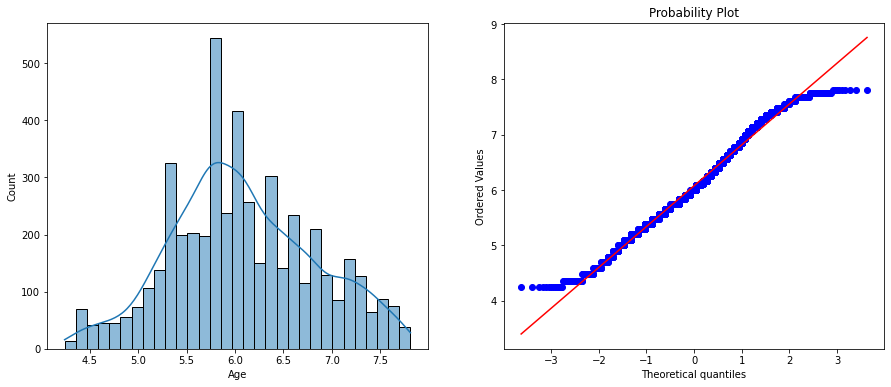

In [105]:
QQ_plot(df3['Age']**(1/2))

Age can be transformed more into Gaussian distribution.

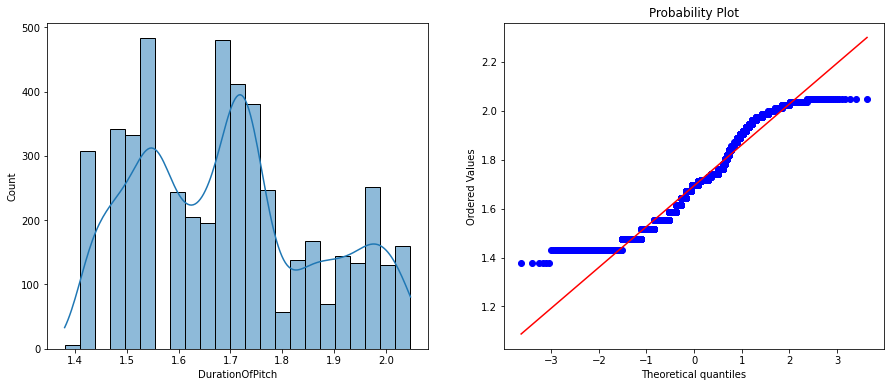

In [124]:
QQ_plot(df3['DurationOfPitch']**(1/5))

DurationOfPitch can be transformed a little bit towards Gaussian distribution.

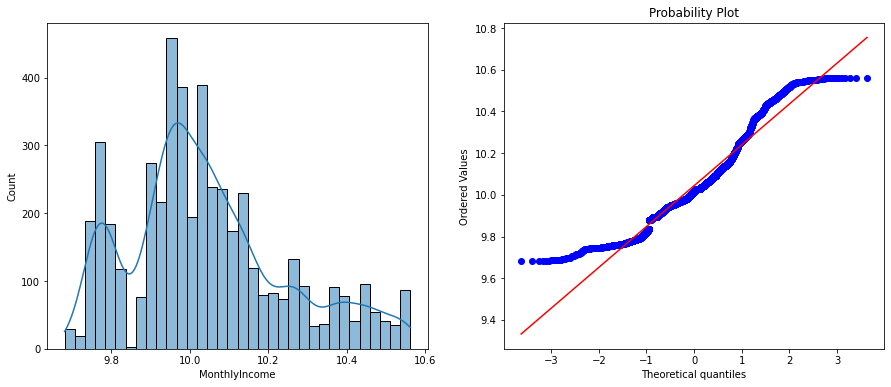

In [133]:
QQ_plot(np.log(df3['MonthlyIncome']))

MonthlyIncome can be transformed more into Gaussian distribution.